In [0]:
#lending club data project

In [0]:
# a few baselines:
# 1. The mean of the majority class (feature catagory) in the target 
# 2. The influence of the main X.
# 3. A kitchen soup linear/logistic regression. 

In [0]:
# Note: Additive approach:
# look at individual feature importances (https://colab.research.google.com/drive/1QJuc5m49nBLm2dh-U9ZiGMcWmFel2xZT#scrollTo=tsmIIGfyjUYd)
# and (start by) adding more (rather than subtracting) X features

In [0]:
# header descriptions...or not...
#https://www.kaggle.com/wendykan/lending-club-loan-data

In [0]:
# Q What will the baseline be?
# What will the target be?
# What will the post-hoc justification for looking be?


In [0]:
import pandas as pd

In [0]:
#so more head displays
#override display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# for colab
# upload file from local drives
from google.colab import files
uploaded = files.upload()


Saving lending_club_loans_1.csv to lending_club_loans_1.csv


In [0]:
df_all = pd.read_csv('lending_club_loans_1.csv')

In [0]:
# for colab
# upload file from local drives
#from google.colab import files
#uploaded = files.upload()

In [0]:
!ls #check file is there

sample_data


In [0]:
#df = pd.read_csv('file_name')

In [0]:
df_all.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# including only clean, no_time_leak, columns

# Only use these features which had nonzero permutation importances in earlier models    
df = df_all.filter(['disbursement_method',
        'debt_settlement_flag',
        'hardship_flag',
        #is delinq_amnt leakage?
        #'delinq_amnt',
        #is acc_now_delinq leakage?
        #'acc_now_delinq',
        'policy_code',
        'application_type',
        #'last_pymnt_amnt',#maybe time leak
        'total_acc',
        'initial_list_statu',
                    
        #'out_prncp',
        #'out_prncp_inv',#redundant?
        #'total_pymnt',
                    
        #'total_pymnt_inv',#redundant?
#total_rec: here there are issues with leakage and inclusion...e.g. people who paid early but paid in full?
        #'total_rec_prncp',
        #'total_rec_int',
        #'total_rec_late_fee',
        #'recoveries',#this may involve loan deliquency time leak
        #'collection_recovery_fee',#this may involve loan deliquency time leak
                    
        'open_acc', #number of open trades since openind account (time leak?)
        'pub_rec',
        'revol_bal',
                    
        #is delinq_2yrs leakage?
        #'delinq_2yrs',
        #'inq_last_6mths',
                    
        'addr_state',
        'purpose',
        'earliest_cr_line',
        'home_ownership',
        'annual_inc',
        'verification_status',
        'issue_d',
        'loan_status',#target
        'pymnt_pla',
        'loan_amnt',
        'funded_amnt',
                    
        #'funded_amnt_inv',#redundant?
                    
        'term',
        'int_rate',
        'installment',
        'grade',
        'sub_grade'])

In [0]:
#df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
#df.isna().sum()

In [0]:
df.shape

In [0]:
df.head(2)

,disbursement_method,debt_settlement_flag,hardship_flag,policy_code,application_type,total_acc,open_acc,pub_rec,revol_bal,addr_state,purpose,earliest_cr_line,home_ownership,annual_inc,verification_status,issue_d,loan_status,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade
0,Cash,N,N,1,Individual,34.0,9.0,1.0,4341,NY,debt_consolidation,Apr-2001,RENT,55000.0,Not Verified,Dec-2018,Current,2500,2500,36 months,13.56,84.92,C,C1
1,Cash,N,N,1,Individual,44.0,13.0,1.0,12315,LA,debt_consolidation,Jun-1987,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,30000,30000,60 months,18.94,777.23,D,D2


In [0]:
#this was moved to the Mangle...Wrangle Function
#the remaining options should be:
#Fully Paid                                             1041952
#Charged Off                                             261655

#df = df[df.loan_status != 'Current']
"""
df = df[df.loan_status != 'Default']
df = df[df.loan_status != 'Late (31-120 days)']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'In Grace Period'] 
df = df[df.loan_status != 'Current']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
"""

"\ndf = df[df.loan_status != 'Default']\ndf = df[df.loan_status != 'Late (31-120 days)']\ndf = df[df.loan_status != 'Late (16-30 days)']\ndf = df[df.loan_status != 'In Grace Period'] \ndf = df[df.loan_status != 'Current']\ndf = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']\ndf = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']\n"

In [0]:
#This displays the original catagories including current and past loans,
# of which only past loans should be included: 
#FUlly Paid vs. charged off
#df['loan_status'].value_counts().sort_values(ascending=False)#[:10]

In [0]:
#df['issue_d'].value_counts().sort_values(ascending=False)#[:10]

In [0]:
#df.head()

In [0]:
#df['loan_status'].unique()

In [0]:
#df['issue_d'].unique()

In [0]:
#df.head()

In [0]:
#df.tail(3)

In [0]:
#df.isna().sum()

In [0]:
#df.describe(exclude='number')

In [0]:
# note: 2 splits, both based on time. 

# remove all the current loans

In [0]:
# Train, Validate, Test Splits

target = 'loan_status'

# time based split

df["issue_d"] = pd.to_datetime(df["issue_d"], infer_datetime_format=True)
test = df[df['issue_d'] >= '2018-07-01 00:00:00']
train_and_val = df[df['issue_d'] < '2018-07-01 00:00:00']


val = train_and_val[train_and_val['issue_d'] < '2016-07-01 00:00:00']
train = train_and_val[train_and_val['issue_d'] >= '2016-07-01 00:00:00']



In [0]:
train.shape, val.shape, test.shape

((884881, 24), (1119181, 24), (256606, 24))

In [0]:
# Wrangle Function + Make Family of Variables



def wrangle(X):
    #Wrangles train, validate, and test sets in the same way
    X = X.copy()

    # Convert date_recorded to datetime
    #X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    #X['issue_d'] = pd.to_datetime(X['issue_d'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year'] = X['issue_d'].dt.year
    X['month'] = X['issue_d'].dt.month
    X['day'] = X['issue_d'].dt.day
    X = X.drop(columns='issue_d')
    
    # Engineer feature: how many years from construction_year to date_recorded
    #X['years'] = X['year_recorded'] - X['construction_year']    
    
    # Drop recorded_by (never varies) and id (always varies, random)
    #unusable_variance = ['recorded_by', 'id']
    #X = X.drop(columns=unusable_variance)
    
    # Removing current rows (to avoid time-leakage/time-travel)
    #the remaining options should be:
    #Fully Paid                                             1041952
    #Charged Off                                             261655
    #df = df[df.loan_status != 'Current']
    X = X[X.loan_status != 'Default']
    X = X[X.loan_status != 'Late (31-120 days)']
    X = X[X.loan_status != 'Late (16-30 days)']
    X = X[X.loan_status != 'In Grace Period'] 
    X = X[X.loan_status != 'Current']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Charged Off']
    
    #X = X.dropna()

    # Drop duplicate columns
    #duplicate_columns = ['quantity_group']
    #X = X.drop(columns=duplicate_columns)
    '''
    #dropping rows
    #not looking at current-incomplete loan data
    #removing not-current rows
    X = X[X.loan_status != 'Default']
    X = X[X.loan_status != 'Late (31-120 days)']
    X = X[X.loan_status != 'Late (16-30 days)']
    X = X[X.loan_status != 'In Grace Period'] 
    X = X[X.loan_status != 'Current']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Charged Off']
    
    
    # Drop empty NaN columns
    empty_columns = ['quantity_group',
                    'revol_bal_joint',
                    'sec_app_earliest_cr_line',
                    'sec_app_inq_last_6mths',
                    'sec_app_mort_acc',
                    'sec_app_open_acc',
                    'sec_app_revol_util',
                    'sec_app_open_act_il',
                    'sec_app_num_rev_accts',
                    'sec_app_chargeoff_within_12_mths',
                    'sec_app_collections_12_mths_ex_med',
                    'sec_app_mths_since_last_major_derog',
                    'hardship_type',
                    'hardship_reason',
                    'hardship_status',
                    'deferral_term',
                    'hardship_amount',
                    'hardship_start_date',
                    'hardship_end_date',
                    'payment_plan_start_date',
                    'hardship_length',
                    'hardship_dpd',
                    'hardship_loan_status',
                    'orig_projected_additional_accrued_interest',
                    'hardship_payoff_balance_amount',
                    'hardship_last_payment_amount',
                    'debt_settlement_flag_date',
                    'settlement_status',
                    'settlement_date',
                    'settlement_amount',
                    'settlement_percentage',
                    'settlement_term',
                    'id',
                    'member_id',
                    'url',
                    'desc',
                    'mths_since_last_delinq',
                    'mths_since_last_record',
                    'next_pymnt_d',
                    'annual_inc_joint',
                    'dti_joint',
                    'verification_status_joint'
                     ]
    
    X = X.drop(columns=empty_columns)
    '''
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    #X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    #cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    #for col in cols_with_zeros:
    #    X[col] = X[col].replace(0, np.nan)
        
    return X





In [0]:
# 2(or 4) splits
# df -> train_and_validate and test
# train_val -> train and val
# Split train into train & val. Make val the same size as test.


#train, val = train_test_split(train, test_size=len(test),  
#                              stratify=train[target], random_state=42)

# Wrangle train, validate, and test sets in the same way
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
#checking to see if current options (rows leaking from future) were removed

In [0]:
train['loan_status'].value_counts().sort_values(ascending=False)

In [0]:
val['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     794181
Charged Off    189767
Name: loan_status, dtype: int64

In [0]:
test['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     10910
Charged Off      624
Name: loan_status, dtype: int64

In [0]:
#exports df (current working directory)
#train.to_csv('train_loanclub_wrangled.csv')

In [0]:
#exports df (current working directory)
#val.to_csv('val_loanclub_wrangled.csv')

In [0]:
#exports df (current working directory)
#test.to_csv('test_loanclub_wrangled.csv')

In [0]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [0]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((308125, 25), (983948, 25), (11534, 25), (308125,), (983948,), (11534,))

In [0]:
# Making Plots

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

#model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.701637	validation_1-auc:0.709869
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.711053	validation_1-auc:0.72358
[2]	validation_0-auc:0.712646	validation_1-auc:0.724595
[3]	validation_0-auc:0.712908	validation_1-auc:0.725164
[4]	validation_0-auc:0.712908	validation_1-auc:0.725164
[5]	validation_0-auc:0.715803	validation_1-auc:0.727006
[6]	validation_0-auc:0.717138	validation_1-auc:0.727272
[7]	validation_0-auc:0.717033	validation_1-auc:0.727305
[8]	validation_0-auc:0.717758	validation_1-auc:0.727643
[9]	validation_0-auc:0.719241	validation_1-auc:0.728244
[10]	validation_0-auc:0.718917	validation_1-auc:0.728198
[11]	validation_0-auc:0.719812	validation_1-auc:0.727982
[12]	validation_0-auc:0.720429	validation_1-auc:0.729415
[13]	validation_0-auc:0.720968	validation_1-auc:0.728686
[14]	validation_0-auc:0.721334	validation_1-auc:0.729894

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba))

Test ROC AUC for class 1:
0.7135373334273426


In [0]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# How to print an AUC?

In [0]:
#eli5 permutation importance

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

In [0]:
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

last_pymnt_amnt         0.079681
debt_settlement_flag    0.019229
int_rate                0.007794
grade                   0.004983
term                    0.001739
sub_grade               0.001560
revol_bal               0.000935
verification_status     0.000660
home_ownership          0.000208
pub_rec                 0.000107
purpose                 0.000079
total_acc               0.000007
earliest_cr_line        0.000006
disbursement_method     0.000002
application_type        0.000002
policy_code             0.000000
hardship_flag           0.000000
year                    0.000000
day                     0.000000
month                  -0.000037
addr_state             -0.000048
annual_inc             -0.000159
open_acc               -0.000209
loan_amnt              -0.009402
funded_amnt            -0.012461
installment            -0.019314
dtype: float64

In [0]:
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0797 ± 0.0007,last_pymnt_amnt
0.0192 ± 0.0002,debt_settlement_flag
0.0078 ± 0.0001,int_rate
0.0050 ± 0.0001,grade
0.0017 ± 0.0001,term
0.0016 ± 0.0001,sub_grade
0.0009 ± 0.0001,revol_bal
0.0007 ± 0.0001,verification_status
0.0002 ± 0.0001,home_ownership
0.0001 ± 0.0000,pub_rec


In [0]:
# experiments after here do not run

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((308125, 25), (983948, 25), (308125, 25), (983948, 25))

In [0]:
eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]



In [0]:
model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.1, # try higher learning rate
    n_jobs=-1
)



In [0]:
model.fit(X_train_encoded, y_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=10)

XGBoostError: [20:10:32] src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label

Trying Random Forest Feature Importance (note: there are no categoricals...)

The scikit-learn Random Forest feature importance ... tends to inflate the importance of continuous or high-cardinality categorical variables. ... Breiman and Cutler, the inventors of Random Forests, indicate that this method of “adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.” — Beware Default Random Forest Importances

In [0]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.5MB/s 


In [0]:
#pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [0]:
#Make pipeline
pipeline = make_pipeline(
    #encode varibles
    ce.OrdinalEncoder(),
    #here there are few/no NaN values (in first sweep)
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)


In [0]:
# Fitting on train, scoring on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8281108351254335


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
#print('Validation Accuracy', accuracy_score(y_val, y_pred))

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 34779, 154988],
       [ 14142, 780039]])

In [0]:
# We need to get labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array(['Charged Off', 'Fully Paid'], dtype='<U11')

In [0]:
# 1. Check that our labels are correct

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted Charged Off', 'Predicted Fully Paid'],
 ['Actual Charged Off', 'Actual Fully Paid'])

In [0]:
# 2. Make it a pandas dataframe
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted Charged Off,Predicted Fully Paid
Actual Charged Off,34779,154988
Actual Fully Paid,14142,780039


In [0]:
import seaborn as sns

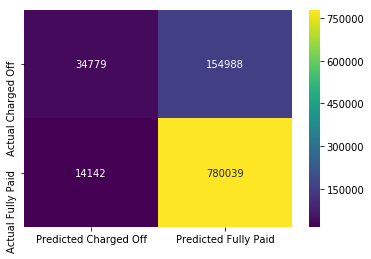

In [0]:

# 3. Plot a heatmap
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
#%matplotlib notebook
#%matplotlib nbagg
#%pylab inline

In [0]:
import matplotlib.pyplot as plt

Getting feature importances

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

In [0]:
# Plot feature importances
#colab
#%matplotlib inline 
#jupyter notebooks
#%matplotlib
#import matplotlib.pyplot as plt

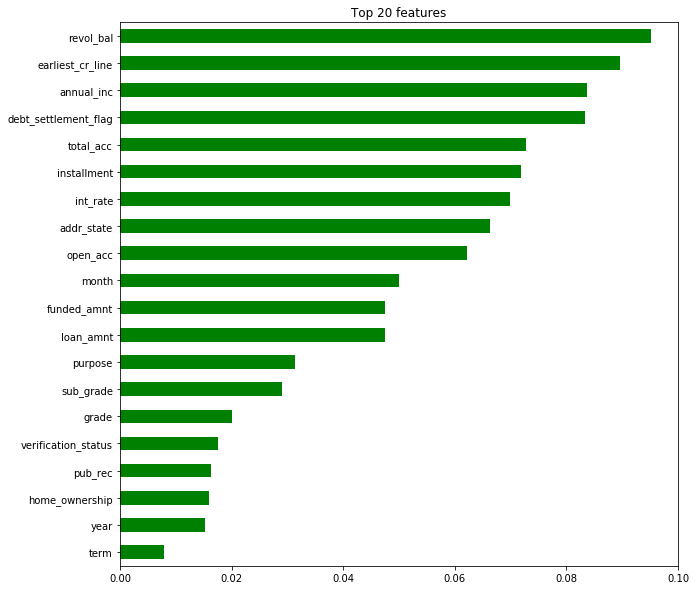

In [0]:
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

SyntaxError: ignored

In [0]:
!pip install shap




     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.31.0-cp36-cp36m-linux_x86_64.whl size=375004 sha256=d91c6c628324ed6cd256c6f8d364b81b8981a2e41c1b63edbd6531a828585dd9
  Stored in directory: /root/.cache/pip/wheels/7b/2d/46/ff8959add2e4e99a18a6e90b82f47508bf52fdf7e7d806f7df
Successfully built shap


In [0]:
import shap

In [0]:
row = X_test.iloc[[-14]]

In [0]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

In [0]:
'''
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

# THIS CELL ISN'T ABOUT THE NEW OBJECTIVES FOR TODAY
# BUT IT IS IMPORTANT FOR YOUR SPRINT CHALLENGE

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

df = pd.DataFrame({
    'id': test_id, 
    'pred_proba': y_pred_proba, 
    'status_group': y_test
})

df = df.merge(
     history[['id', 'issue_d', 'sub_grade', 'percent_paid', 'term', 'int_rate']], 
     how='left'
)

df.head()

fully_paid = df['status_group'] == 'Fully Paid'
charged_off = ~fully_paid
right = (fully_paid) == (df['pred_proba'] > 0.50)
wrong = ~right

df[fully_paid & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

# To explain the prediction for test observaition with index #3094,
# first, get all of the features for that observation
row = X_test.iloc[[3094]]

# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(15,20));

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Top 3 reasons for prediction:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}.')

print('\n')
print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}.')

def explain(row_number):
    positive_class = 'Fully Paid'
    positive_class_index = 1
    
    
    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)
    
    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba
    
    # Show predictiion & probability
    print(f'The model predicts this loan is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)
    
    # Get top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    # Show top 3 reasons for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')
    
    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row
    )

    
explain(3094)

df[charged_off & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

explain(8383)

df[fully_paid & wrong].sample(n=10, random_state=1).sort_values(by='pred_proba')

explain(18061)

explain(6763)

df[charged_off & wrong].sample(n=10, random_state=1).sort_values(by='pred_proba')

explain(19883)
'''

'\nimport category_encoders as ce\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.pipeline import make_pipeline\nfrom xgboost import XGBClassifier\n\nprocessor = make_pipeline(\n    ce.OrdinalEncoder(), \n    SimpleImputer(strategy=\'median\')\n)\n\nX_train_processed = processor.fit_transform(X_train)\nX_val_processed = processor.transform(X_val)\n\neval_set = [(X_train_processed, y_train), \n            (X_val_processed, y_val)]\n\nmodel = XGBClassifier(n_estimators=1000, n_jobs=-1)\nmodel.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric=\'auc\', \n          early_stopping_rounds=10)\n\n# THIS CELL ISN\'T ABOUT THE NEW OBJECTIVES FOR TODAY\n# BUT IT IS IMPORTANT FOR YOUR SPRINT CHALLENGE\n\nfrom sklearn.metrics import roc_auc_score\nX_test_processed = processor.transform(X_test)\nclass_index = 1\ny_pred_proba = model.predict_proba(X_test_processed)[:, class_index]\nprint(f\'Test ROC AUC for class {class_index}:\')\nprint(roc_auc_score(y_test, y_pred_proba)) # Ran

In [0]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 157kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=082d06fd5af17a562cf18c5541a02af86fc3749aeb666aa6e27e2a30a26cb624
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'loan_status'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

NameError: ignored

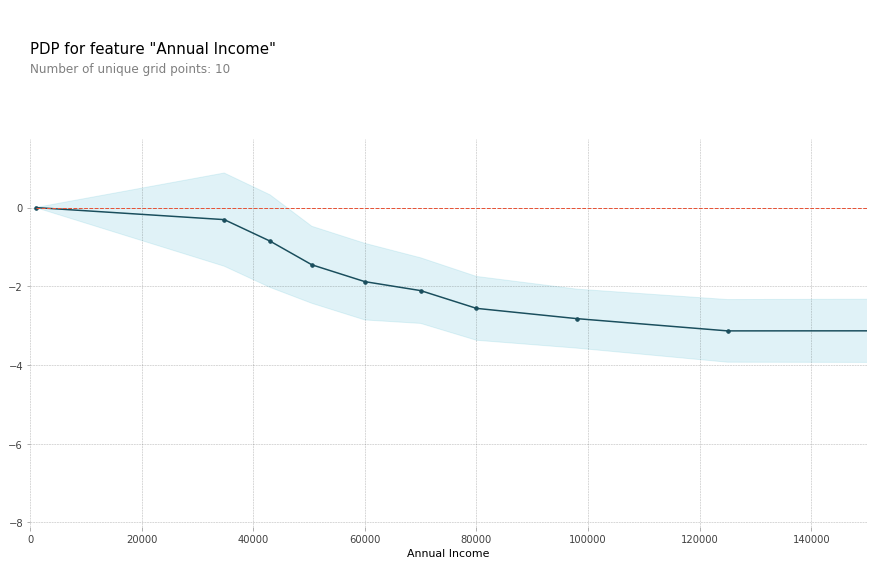

In [0]:
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,150000);

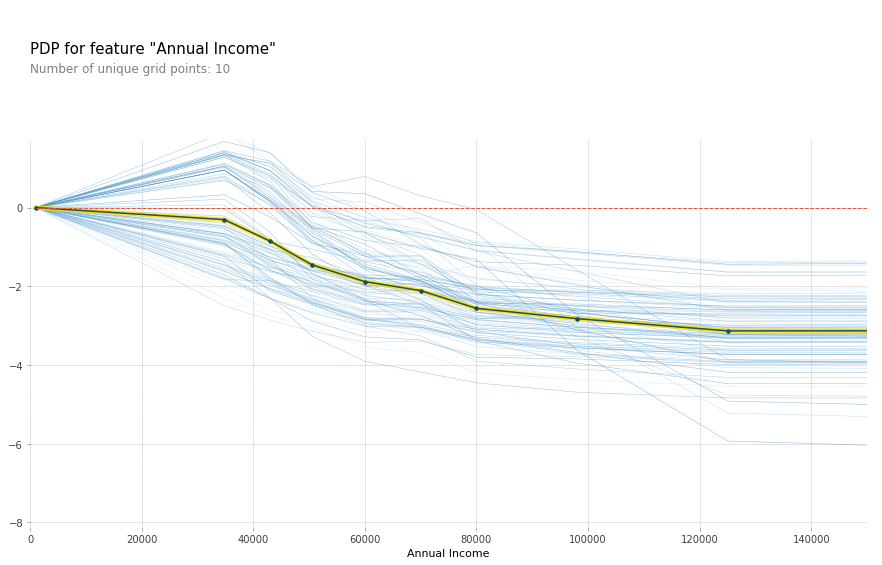

In [0]:
# Plot PDP with 100 ICE curves
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
plt.xlim(0,150000);